In [980]:
import os
import torch
os.environ['TORCH'] = torch.__version__
print(torch.__version__)

!pip install -q torch-scatter -f https://data.pyg.org/whl/torch-${TORCH}.html
# !pip install -q torch-sparse -f https://data.pyg.org/whl/torch-${TORCH}.html
!pip install torch-scatter torch-sparse -f https://data.pyg.org/whl/torch-1.12.1+cpu.html
!pip install -q git+https://github.com/pyg-team/pytorch_geometric.git

1.12.1+cpu
Looking in links: https://data.pyg.org/whl/torch-1.12.1+cpu.html


In [981]:
import torch
from torch_geometric.data import Data
import networkx as nx
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from sklearn import preprocessing


In [982]:
path ='../Data/Kinase_proteins/network_edges_kinase_proteins.tsv'
data = pd.read_csv(path, delimiter='\t')
edge_index1=data['#node1'].to_numpy()
edge_index2=data['node2'].to_numpy()

In [983]:
le = preprocessing.LabelEncoder()
le.fit(edge_index1)
len(list(le.classes_))

117

In [984]:
edge_index1 = le.transform(edge_index1)
edge_index2 = le.transform(edge_index2)

In [985]:
edge_index = [edge_index1]+[edge_index2]
edge_index = np.array(edge_index)

In [986]:
edge_index

array([[  0,   0,   0, ..., 114, 115, 116],
       [ 86,  87,  78, ..., 115, 114,  23]])

In [987]:
genes = pd.read_csv('../Data/Kinase_proteins/Kinase_gene_matrix.csv')
Y = genes.Y

genes = genes.iloc[:,1:118] 
genes

,AKAP1,AKAP10,AKAP12,AKAP13,AKAP14,AKAP4,AKAP5,AKAP7,AKAP8,AKAP9,...,SH3KBP1,SKP1,SKP2,TAB1,TAB2,TAB3,TEC,WNK1,WNK2,ZAP70
0,34.608085,33.496161,33.708977,35.071896,22.030411,21.292506,25.036127,32.352171,32.364362,34.799151,...,33.84640,36.93410,32.63417,31.95379,34.91153,31.28668,29.68056,36.11211,24.43924,31.17945
1,33.991203,33.321684,34.364882,35.360390,22.030411,22.762193,28.279929,32.332165,32.865812,35.333528,...,33.48549,37.99486,31.80604,31.26559,35.52924,31.96868,30.78769,35.66152,27.36432,29.38780
2,33.383751,33.224008,31.941494,35.090412,22.030411,21.292506,29.082875,32.506326,33.310765,34.894155,...,34.57324,37.51718,32.78642,31.28554,36.91118,31.50909,31.05624,36.41957,30.08133,29.53435
3,33.504572,34.388289,33.921804,35.522805,22.030411,24.479975,28.863519,32.080430,32.663189,35.605425,...,33.06747,37.50937,31.60685,30.86918,35.41662,32.18003,30.20403,35.95344,29.61611,29.32770
4,33.960169,32.784996,34.566394,36.050989,22.030411,21.292506,25.036127,25.443711,33.156714,35.929770,...,34.04029,36.23707,32.31155,28.88966,36.12132,32.74898,27.76103,34.91137,31.53988,30.59498
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
176,34.044939,33.310459,34.008777,35.508424,22.537241,21.811701,26.714716,30.997207,33.140357,34.738921,...,34.41749,36.82747,31.66193,31.97549,36.17351,31.01873,29.74909,35.58595,26.95678,29.29301
177,32.418678,34.110995,33.243186,33.134963,22.537241,21.811701,28.895484,33.607378,33.533021,35.944165,...,32.25504,39.20730,32.99457,28.61897,36.27230,31.53447,31.71446,34.77170,26.95678,29.65655
178,33.336106,33.381949,31.526169,35.679063,22.537241,21.811701,28.132297,32.065304,32.283709,35.312405,...,34.52289,36.63033,32.86507,30.50706,36.31789,32.47015,31.08636,36.40378,26.95678,30.95118
179,34.026063,33.764835,33.884949,35.482404,22.537241,21.811701,29.201802,30.616063,34.317215,35.289050,...,33.21247,36.52119,32.84061,32.27365,34.55019,32.38527,30.64727,36.22588,32.26433,30.96574


In [988]:
edge_index = torch.tensor(edge_index, dtype=torch.int64)
edge_index

tensor([[  0,   0,   0,  ..., 114, 115, 116],
        [ 86,  87,  78,  ..., 115, 114,  23]])

In [989]:
list_data=[]

for g in range(len(genes)):
  b=[]
  for i in genes.iloc[g].to_numpy():
    a=[]
    a.append(i)
    b.append(a)
  x = torch.tensor([b], dtype=torch.long).reshape([-1])
  edge_index = edge_index
  y = torch.tensor([Y.iloc[g]], dtype=torch.float).reshape([-1, 1])
  data = Data(x=x, edge_index=edge_index, y=y)
  list_data.append(data)

print(list_data[0])

Data(x=[117], edge_index=[2, 552], y=[1, 1])


C:\Users\sandr\AppData\Local\Temp/ipykernel_16364/3352282437.py:9: DeprecationWarning: an integer is required (got type numpy.float64).  Implicit conversion to integers using __int__ is deprecated, and may be removed in a future version of Python.
  x = torch.tensor([b], dtype=torch.long).reshape([-1])


In [990]:
data = list_data[0]
print(f'Number of nodes: {data.num_nodes}')
print(f'Number of charcateristics per node: {data.num_features}')
print(f'Number of edges: {data.num_edges}')
print(f'Average node degree: {data.num_edges / data.num_nodes:.2f}')
print(f'Has isolated nodes: {data.has_isolated_nodes()}')
print(f'Has self-loops: {data.has_self_loops()}')
print(f'Is undirected: {data.is_undirected()}')

Number of nodes: 117
Number of charcateristics per node: 1
Number of edges: 552
Average node degree: 4.72
Has isolated nodes: False
Has self-loops: False
Is undirected: True


In [991]:
import random
torch.manual_seed(0)
random.shuffle(list_data)
train_dataset = list_data[0:154]
test_dataset = list_data[154:182]
print(f'Number of training graphs: {len(train_dataset)}')
print(f'Number of test graphs: {len(test_dataset)}')

Number of training graphs: 154
Number of test graphs: 27


In [992]:
from torch_geometric.loader import DataLoader

train_loader = DataLoader(train_dataset, batch_size=64, shuffle=True)
test_loader = DataLoader(test_dataset, batch_size=64, shuffle=False)

for step, data in enumerate(train_loader):
    print(f'Step {step + 1}:')
    print('=======')
    print(f'Number of graphs in the current batch: {data.num_graphs}')
    print(data)
    print()

Step 1:
Number of graphs in the current batch: 64
DataBatch(x=[7488], edge_index=[2, 35328], y=[64, 1], batch=[7488], ptr=[65])

Step 2:
Number of graphs in the current batch: 64
DataBatch(x=[7488], edge_index=[2, 35328], y=[64, 1], batch=[7488], ptr=[65])

Step 3:
Number of graphs in the current batch: 26
DataBatch(x=[3042], edge_index=[2, 14352], y=[26, 1], batch=[3042], ptr=[27])



In [993]:
import torch
from torch.nn import Linear
import torch.nn.functional as F
from torch_geometric.nn import GraphConv, global_add_pool
embed_dim = 117
from torch_geometric.nn import TopKPooling
from torch_geometric.nn import global_mean_pool as gap, global_max_pool as gmp

class Net(torch.nn.Module):
    def __init__(self, dim):
        super(Net, self).__init__()
        self.dim = dim
        super(Net, self).__init__()
        self.conv1 = GraphConv(embed_dim, dim)
        self.pool1 = TopKPooling(dim, ratio=0.8)
        self.conv2 = GraphConv(dim, dim)
        self.pool2 = TopKPooling(dim, ratio=0.8)
        self.item_embedding = torch.nn.Embedding(num_embeddings=390, embedding_dim=embed_dim)
        self.lin1 = torch.nn.Linear(234, 51)
        self.lin3 = torch.nn.Linear(51, 1)
        self.act1 = torch.nn.ReLU()
        print(self)

    def forward(self, x, edge_index, batch):
        x = torch.tensor(x).to(torch.int)
        x = self.item_embedding(x)
        x = x.squeeze(1)

        x = F.relu(self.conv1(x, edge_index))

        x, edge_index, _, batch, _, _ = self.pool1(x, edge_index, None, batch)
        x1 = torch.cat([gmp(x, batch), gap(x, batch)], dim=1)

        x = F.relu(self.conv2(x, edge_index))

        x, edge_index, _, batch, _, _ = self.pool2(x, edge_index, None, batch)
        x2 = torch.cat([gmp(x, batch), gap(x, batch)], dim=1)

        x = x1 + x2

        x = self.lin1(x)
        x = self.act1(x)

        x = F.dropout(x, p=0.5, training=self.training)
        x = torch.sigmoid(self.lin3(x)).squeeze(1)
        return x


In [994]:
from torch import nn
from sklearn.metrics import roc_auc_score

def train(epoch):
    model.train()
    criterion = nn.BCELoss()
    loss_all = 0
    for data in train_loader:
        output = model(data.x, data.edge_index, data.batch)
        # print("OUTPUT")
        # print(output)
        loss = criterion(output, data.y.squeeze(1))
        optimizer.zero_grad()
        loss.backward()
        # print(loss.item())
        # print(data.num_graphs)
        # print(loss_all)
        optimizer.step()
        loss_all += loss.item() * data.num_graphs

    return loss_all / len(train_dataset)


def test(loader):
    model.eval()

    correct = 0
    for data in loader:
        data = data
        output = model(data.x, data.edge_index, data.batch)
        for i in range(len(output)):
            if output[i]>0.5:
                output[i]=1
            else:
                output[i]=0
            if output[i]==data.y[i]:
                correct=correct+1
    # print("Correct: "+str(correct) +" of "+str(len(loader.dataset)))
    return correct / len(loader.dataset)

Net(
  (conv1): GraphConv(117, 117)
  (pool1): TopKPooling(117, ratio=0.8, multiplier=1.0)
  (conv2): GraphConv(117, 117)
  (pool2): TopKPooling(117, ratio=0.8, multiplier=1.0)
  (item_embedding): Embedding(390, 117)
  (lin1): Linear(in_features=234, out_features=51, bias=True)
  (lin3): Linear(in_features=51, out_features=1, bias=True)
  (act1): ReLU()
)


C:\Users\sandr\AppData\Local\Temp/ipykernel_16364/2512493377.py:25: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  x = torch.tensor(x).to(torch.int)


Epoch: 001, Loss: 0.7010, Train Acc: 0.5195, Test Acc: 0.5926
Epoch: 002, Loss: 0.6906, Train Acc: 0.5195, Test Acc: 0.5926
Epoch: 003, Loss: 0.6879, Train Acc: 0.5195, Test Acc: 0.5926
Epoch: 004, Loss: 0.6860, Train Acc: 0.5260, Test Acc: 0.5926
Epoch: 005, Loss: 0.6900, Train Acc: 0.5260, Test Acc: 0.5926
Epoch: 006, Loss: 0.6802, Train Acc: 0.5649, Test Acc: 0.6667
Epoch: 007, Loss: 0.6832, Train Acc: 0.6234, Test Acc: 0.5556
Epoch: 008, Loss: 0.6746, Train Acc: 0.6364, Test Acc: 0.6296
Epoch: 009, Loss: 0.6646, Train Acc: 0.6818, Test Acc: 0.7037
Epoch: 010, Loss: 0.6553, Train Acc: 0.6364, Test Acc: 0.6296
Epoch: 011, Loss: 0.6389, Train Acc: 0.6558, Test Acc: 0.6667
Epoch: 012, Loss: 0.6350, Train Acc: 0.6818, Test Acc: 0.6296
Epoch: 013, Loss: 0.6229, Train Acc: 0.6753, Test Acc: 0.5926
Epoch: 014, Loss: 0.5987, Train Acc: 0.6883, Test Acc: 0.6667
Epoch: 015, Loss: 0.6279, Train Acc: 0.7078, Test Acc: 0.6667
Epoch: 016, Loss: 0.6321, Train Acc: 0.7273, Test Acc: 0.6296
Epoch: 0

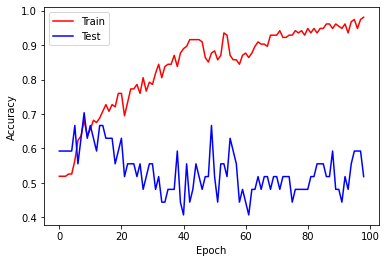

In [995]:
import matplotlib.pyplot as plt
model = Net(dim=117)
optimizer = torch.optim.Adam(model.parameters(), lr=0.001)
train_epoch=[]
test_epoch=[]
for epoch in range(1,100):
    loss = train(epoch)
    train_acc = test(train_loader)
    test_acc = test(test_loader)
    train_epoch.append(train_acc)
    test_epoch.append(test_acc)
    print(f'Epoch: {epoch:03d}, Loss: {loss:.4f}, '
          f'Train Acc: {train_acc:.4f}, Test Acc: {test_acc:.4f}')

plt.plot(train_epoch, color="red", label='Train')
plt.plot(test_epoch, color="blue", label = 'Test')
plt.xlabel("Epoch")
plt.ylabel("Accuracy")
plt.legend()